# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform a regression task and a classification task. You need to implement two classes, `DenseLayer` and `Feedforward`, and the `train` function `in implementation.py` 

In [7]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%autosave 60


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 60 seconds


## 1. Implement the two classes and one function (10 points)

In this step, you should implement the two classes and one function mentioned above. The autograder can check the correcness of your two classes, `DenseLayer` and `Feedforward`. Correct implementation of each of the two classes worths 5 points, so you will 10 points if you make both correct. 

The autograder cannot check the training function because this function takes too much time to run. 



## 2. A toy regression problem

By this step, you should already have implemented all necessary classes and functions in `implementation.py`. In this task, we have a toy regression problem. Please the data below and think about this question: is overfitting a problem for this problem? **Please write your answer below** (This particular question has no points, but you may want to show your thought). 

Overfitting is most likely not an issue for this problem as all points are directly sampled from the underlying function. Because there is no random variation introduced, a network acting as a universal function approximator will not attempt to account for such random variations. Therefore, a function will be able to be identified that is able to match the observed data with 100% accuracy.

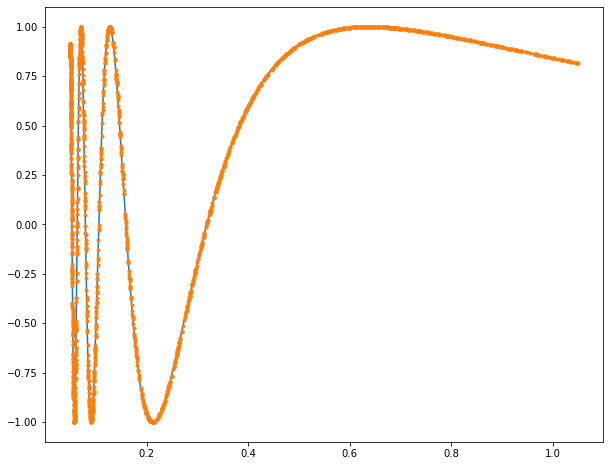

In [8]:
def target_func(x):
    y = np.sin(1 / x)
    return y

# initialize training and validation sets. 
x_train = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_train = target_func(x_train)

x_val = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_val = target_func(x_val)


# plot the function and data points
# Do you worry about overfitting problem?
sort_ind = np.argsort(x_train[:, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0], '.')


### Train the model  (5 points)

Now lets run your `train` function on this data. You will need to save your model to a file and submit it. We will test your saved model. You will earn 
 * 2 points if your validation MSE is smaller than 0.1
 * 4 points if your validation MSE is smaller than 0.05
 * 5 points if your validation MSE is smaller than 0.01



In [103]:
from implementation import train

# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.000001, num_train_epochs=150, task_type='regression')

#For testing
# TODO- ask Kapil if I can use my own settings for reg_weight and num epochs
model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[512, 256, 128], 
                       reg_weight=0.0001, num_train_epochs=1000, task_type='regression') #this works well

# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.0001, num_train_epochs=500, task_type='regression')




Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8/8 [==============================] - 0s 31ms/step - loss: 0.6349 - val_loss: 0.4845
Epoch 2/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.4792 - val_loss: 0.4763
Epoch 3/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.4745 - val_loss: 0.4519
Epoch 4/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.4493 - val_loss: 0.4372
Epoch 5/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.4389 - val_loss: 0.4245
Epoch 6/1000


8/8 [==============================] - 0s 25ms/step - loss: 0.2923 - val_loss: 0.2939
Epoch 74/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2928 - val_loss: 0.2937
Epoch 75/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2929 - val_loss: 0.2962
Epoch 76/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2933 - val_loss: 0.2943
Epoch 77/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2938 - val_loss: 0.2950
Epoch 78/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2921 - val_loss: 0.2933
Epoch 79/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.2924 - val_loss: 0.2930
Epoch 80/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2919 - val_loss: 0.2939
Epoch 81/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2921 - val_loss: 0.2931
Epoch 82/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2912 - val_loss: 0.2926
Epoch 83/1000


8/8 [==============================] - 0s 26ms/step - loss: 0.2547 - val_loss: 0.2444
Epoch 155/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.2521 - val_loss: 0.2412
Epoch 156/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2528 - val_loss: 0.2418
Epoch 157/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2482 - val_loss: 0.2371
Epoch 158/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2472 - val_loss: 0.2378
Epoch 159/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2447 - val_loss: 0.2329
Epoch 160/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2426 - val_loss: 0.2317
Epoch 161/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2396 - val_loss: 0.2277
Epoch 162/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.2377 - val_loss: 0.2266
Epoch 163/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.2351 - val_loss: 0.2236
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.1952 - val_loss: 0.1766
Epoch 236/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1917 - val_loss: 0.1771
Epoch 237/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1925 - val_loss: 0.1720
Epoch 238/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1916 - val_loss: 0.1730
Epoch 239/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1901 - val_loss: 0.1727
Epoch 240/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.1911 - val_loss: 0.1728
Epoch 241/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1911 - val_loss: 0.1720
Epoch 242/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.1902 - val_loss: 0.1736
Epoch 243/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.1899 - val_loss: 0.1729
Epoch 244/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.1921 - val_loss: 0.1720
Epoch

8/8 [==============================] - 0s 24ms/step - loss: 0.1898 - val_loss: 0.1736
Epoch 317/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1897 - val_loss: 0.1701
Epoch 318/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1877 - val_loss: 0.1718
Epoch 319/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1886 - val_loss: 0.1704
Epoch 320/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1889 - val_loss: 0.1709
Epoch 321/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1907 - val_loss: 0.1722
Epoch 322/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1893 - val_loss: 0.1705
Epoch 323/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1910 - val_loss: 0.1701
Epoch 324/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1896 - val_loss: 0.1711
Epoch 325/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1884 - val_loss: 0.1701
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.1882 - val_loss: 0.1709
Epoch 398/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1877 - val_loss: 0.1692
Epoch 399/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1883 - val_loss: 0.1753
Epoch 400/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1896 - val_loss: 0.1708
Epoch 401/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1881 - val_loss: 0.1723
Epoch 402/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1876 - val_loss: 0.1695
Epoch 403/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1878 - val_loss: 0.1703
Epoch 404/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.1870 - val_loss: 0.1691
Epoch 405/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1870 - val_loss: 0.1704
Epoch 406/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1873 - val_loss: 0.1697
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.1871 - val_loss: 0.1713
Epoch 479/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1872 - val_loss: 0.1699
Epoch 480/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1859 - val_loss: 0.1684
Epoch 481/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1856 - val_loss: 0.1682
Epoch 482/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1861 - val_loss: 0.1689
Epoch 483/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1870 - val_loss: 0.1687
Epoch 484/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1868 - val_loss: 0.1694
Epoch 485/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1870 - val_loss: 0.1692
Epoch 486/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1855 - val_loss: 0.1695
Epoch 487/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1851 - val_loss: 0.1680
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.1744 - val_loss: 0.1598
Epoch 560/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1738 - val_loss: 0.1578
Epoch 561/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1745 - val_loss: 0.1579
Epoch 562/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1723 - val_loss: 0.1566
Epoch 563/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1726 - val_loss: 0.1567
Epoch 564/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1740 - val_loss: 0.1564
Epoch 565/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1722 - val_loss: 0.1561
Epoch 566/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1719 - val_loss: 0.1593
Epoch 567/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1741 - val_loss: 0.1579
Epoch 568/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1705 - val_loss: 0.1563
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.1123 - val_loss: 0.1046
Epoch 641/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.1127 - val_loss: 0.1045
Epoch 642/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1160 - val_loss: 0.1039
Epoch 643/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.1099 - val_loss: 0.0989
Epoch 644/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1081 - val_loss: 0.0959
Epoch 645/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.1081 - val_loss: 0.0941
Epoch 646/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.1059 - val_loss: 0.0977
Epoch 647/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1057 - val_loss: 0.0922
Epoch 648/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.1013 - val_loss: 0.0896
Epoch 649/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0995 - val_loss: 0.0901
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.0267 - val_loss: 0.0243
Epoch 722/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.0262 - val_loss: 0.0251
Epoch 723/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0263 - val_loss: 0.0225
Epoch 724/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0260 - val_loss: 0.0295
Epoch 725/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0271 - val_loss: 0.0215
Epoch 726/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0238 - val_loss: 0.0212
Epoch 727/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0237 - val_loss: 0.0229
Epoch 728/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0242 - val_loss: 0.0236
Epoch 729/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0237 - val_loss: 0.0210
Epoch 730/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0226 - val_loss: 0.0194
Epoch

8/8 [==============================] - 0s 25ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 803/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 804/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 805/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 806/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 807/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 808/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 809/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 810/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 811/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch

8/8 [==============================] - 0s 29ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 884/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 885/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 886/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 887/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 888/1000
8/8 [==============================] - 0s 28ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 889/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 890/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 891/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 892/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch

Epoch 964/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 965/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 966/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 967/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 968/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 969/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.0013 - val_loss: 9.3822e-04
Epoch 970/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 971/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 972/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 973/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - val

### Plot training trace and the fitted model

Text(0, 0.5, 'Loss')

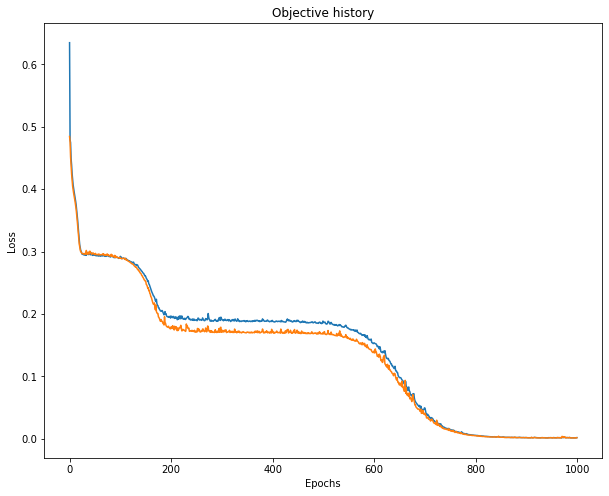

In [104]:
# Plot the loss function and train / validation accuracies
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')


I am in the network function!


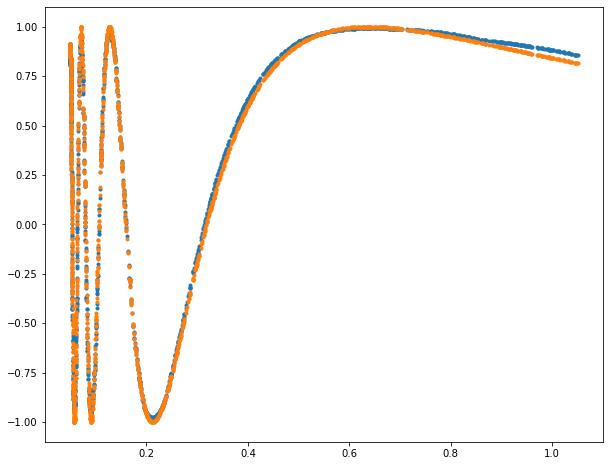

In [105]:
y_pred = model.predict(x_val)

plt.plot(x_val[:, 0], y_pred[:, 0], '.')

#to check results
plt.plot(x_val[:, 0], y_val[:, 0], '.')

### Save the model 

Please save your model as follows. Make sure the saved model can be loaded correctly with `tf.keras.models.load_model('sin_inv_x.kmod')`. *If your model cannot be loaded, you will get zero points for this problem.*



In [106]:
model.save('sin_inv_x.kmod')


I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
I am in the network function!
INFO:tensorflow:Assets written to: sin_inv_x.kmod\assets


## 3. Classifying hand-written digits

This task is a classification problem on the famous MNIST dataset. 

### Load the data

In [ ]:
from sklearn.model_selection import train_test_split

# load the dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()

# separate a validation set
x_train, y_train = data_train 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

x_test, y_test = data_test

# treating images as vectors and create one hot representations of labesl

x_train = x_train.reshape([-1, 28 * 28])
x_val = x_val.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

y_train = tf.one_hot(y_train, depth=10).numpy()
y_val = tf.one_hot(y_val, depth=10).numpy()
y_test = tf.one_hot(y_test, depth=10).numpy()


print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)



### Train a model

In [ ]:
from implementation import train

model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=40,  task_type='classification')


### Debug the training (10 points)

A neural network with your initial setting may not work straightforwardly, so you will need to diagnose the problems in the training procedure. One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. This task gives you a chance to gain some experience. Below, you should experiment with different values of the various hyperparameters, including 
 * data preparation (data normalization and data augmentation)
 * the achitecture (depth, hidden layer sizes, and activation functions), 
 * optimization (optimization algorithm, learning rate, learning rate decay, batch size, and numer of training epochs)
 * regularization (regularization weight, dropout).

**Expected results**. You goal in this exercise is to get as good of a result as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).  You should be aim to achieve a classification accuracy of greater than 80% on the test results.

**Grading**. You will get 
  * 5 points if your model has an accuracy over 0.70
  * 8 points if your model has an accuracy over 0.80
  * 10 points if your model has an accuracy over 0.90

In [ ]:




# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


In [ ]:
from vis_utils import visualize_grid

W1 = model.layers[0].W.numpy()
W1 = W1.transpose()
W1 = W1.reshape([W1.shape[0], 28, 28, 1])

plt.imshow(visualize_grid(W1))



Finally, test the model on the test set and show the accuracy. 

In [ ]:
y_pred = model.predict(x_test.astype(np.float32))

acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))

print('The test accuracy is ', acc)

### Save the model

In [ ]:
model.save('mnist_cls.kmod')

## Question (5 points): what have you learned from this assignment? 

Please summarize your model tuning experience into three points below. If possible, please elaborate after your summarization. 

*Answer*:
